# Chapter 5-1: Linear Discriminant Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [2]:
#from pathlib import Path
#Path('.').resolve()
#FIGURES = Path('.').resolve() / 'figures'
#FIGURES.mkdir(exist_ok=True, parents=True)

## Example 1: Riding Mowers

We return to the example in which a riding mower manufacturer would like to find a way of classifying families in a city into those likely to purchase a riding mower and those not likely to purchase one. A pilot random sample of **12 owners** and **12 nonowners** in the city is undertaken. 

We can think of a linear classification rule as a **line that separates the two-dimensional region into two parts**, with most of the owners in one half-plane and most nonowners in the complementary half-plane. A good classification rule would separate the data so that the fewest points are misclassified.

In [3]:
mower_df = pd.read_csv('data/RidingMowers.csv')
da_reg = LDA()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

c_income = da_reg.coef_[0, 0]
c_lotSize = da_reg.coef_[0, 1]
intercept = da_reg.intercept_[0]

print('Coefficients:', da_reg.coef_)
print('Intercept:', da_reg.intercept_)
print() 

print('Decision function:')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))

test_obs = pd.DataFrame({'Income': [60], 'Lot_Size': [18.4]})
print('\nExample: Income=$60K, Lot_Size=18.4Kft2')
print('  {:.2f}*60 + {:.2f}*18.4 + {:.2f} = {:.2f}'.format(c_income, c_lotSize, intercept,
                                                           da_reg.decision_function(test_obs)[0]))
print('  negative => nonowner')

Coefficients: [[0.1002303  0.78518471]]
Intercept: [-21.73876167]

Decision function:
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example: Income=$60K, Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


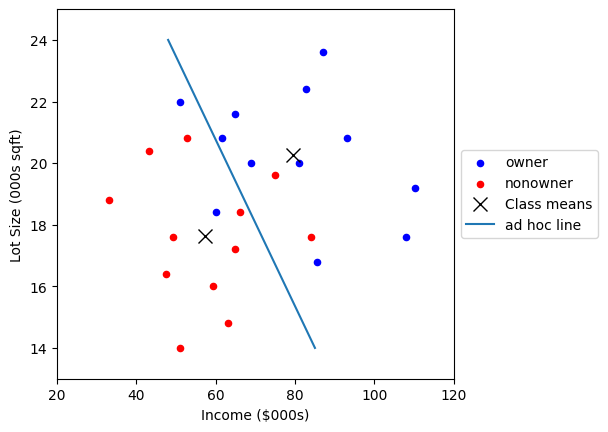

In [4]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', 
                                                        c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', 
                                                   c='red', label='nonowner', ax=ax)

# plot two class means
ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=10)

# plot an ad hoc decision boundary
x_adhoc = np.array([48, 85])
y_adhoc = np.array([24, 14])
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')

ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig(str(FIGURES / 'adhoc.pdf'))
plt.show()

The line shown above seems to do a good job in discriminating between the two classes as it makes four misclassifications out of 24 points. Can we do better?

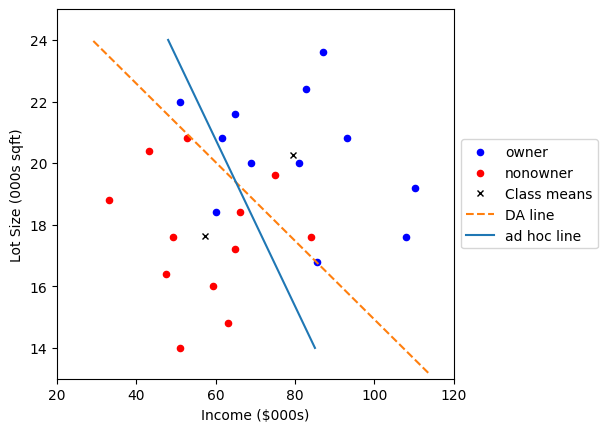

In [5]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', 
                                                        c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', 
                                                   c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', 
        label='Class means', markersize=5)

# decision boundary: intercept + c_income * x + c_lotSize * y = 0
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize

ax.plot(x_lda, y_lda, '--', color='C1', label='DA line')
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig(str(FIGURES / 'LDA_adhoc.pdf'))
plt.show()

In [6]:
da_reg = LDA()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

result_df = mower_df.copy()
result_df.index = result_df.index + 1

# decision function: intercept + c_income * x + c_lotSize * y
result_df['Dec. Function'] = da_reg.decision_function(mower_df.drop(columns=['Ownership']))

# prediction: 1 if p(Owner) > 0.5
result_df['Prediction'] = da_reg.predict(mower_df.drop(columns=['Ownership']))

# estimated probability of being an owner
result_df['p(Owner)'] = da_reg.predict_proba(mower_df.drop(columns=['Ownership']))[:, 1]

print(result_df)

    Income  Lot_Size Ownership  Dec. Function Prediction  p(Owner)
1     60.0      18.4     Owner      -1.277545   Nonowner  0.217968
2     85.5      16.8     Owner       0.022032      Owner  0.505508
3     64.8      21.6     Owner       1.716152      Owner  0.847632
4     61.5      20.8     Owner       0.757244      Owner  0.680755
5     87.0      23.6     Owner       5.511634      Owner  0.995977
6    110.1      19.2     Owner       4.372141      Owner  0.987533
7    108.0      17.6     Owner       2.905362      Owner  0.948111
8     82.8      22.4     Owner       4.148445      Owner  0.984456
9     69.0      20.0     Owner       0.880823      Owner  0.706993
10    93.0      20.8     Owner       3.914499      Owner  0.980440
11    51.0      22.0     Owner       0.647047      Owner  0.656345
12    81.0      20.0     Owner       2.083587      Owner  0.889298
13    75.0      19.6  Nonowner       1.168131      Owner  0.762807
14    52.8      20.8  Nonowner      -0.114760   Nonowner  0.47

In [7]:
score = result_df['Dec. Function']

# probability of being an owner
prob = np.exp(score) / (1 + np.exp(score))

# predicted class at cutoff 0.5
pred = np.where(prob > 0.5, 'Owner', 'Nonowner')

print(prob[:5])
print()

print(pred[:5])

1    0.217968
2    0.505508
3    0.847632
4    0.680755
5    0.995977
Name: Dec. Function, dtype: float64

['Nonowner' 'Owner' 'Owner' 'Owner' 'Owner']


In [8]:
print('training accuracy is', 
      da_reg.score(mower_df.drop(columns=['Ownership']), mower_df['Ownership']))

training accuracy is 0.875


One can also use pre-determined prior probabilities.

In [9]:
mower_df.Ownership.value_counts(normalize=True)

Ownership
Owner       0.5
Nonowner    0.5
Name: proportion, dtype: float64

In [10]:
# 0.85 is the prior probability of being an nonowner
# 0.15 is the prior probability of being an owner
da_reg_prior = LDA(priors=[0.85,0.15])
da_reg_prior.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
da_reg = LDA()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

c_income_prior = da_reg_prior.coef_[0, 0]
c_lotSize_prior = da_reg_prior.coef_[0, 1]
intercept_prior = da_reg_prior.intercept_[0]

print('Decision function：')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income_prior, c_lotSize_prior, intercept_prior))


test1 = pd.DataFrame({'Income': [75, 84], 'Lot_Size': [19.6, 17.6]})
print('\nCase 1: Income=$75K Lot_Size=19.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(test1)[0], da_reg_prior.predict(test1)[0]))

test2 = pd.DataFrame({'Income': [75, 84], 'Lot_Size': [19.6, 17.6]})
print('\nCase 2: Income=$84K Lot_Size=17.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(test2)[0], da_reg_prior.predict(test2)[0]))


Decision function：
 = 0.10*Income + 0.79*Lot_Size + -23.47

Case 1: Income=$75K Lot_Size=19.6Kft2
  Owner (no-priors) => Nonowner (priors)

Case 2: Income=$84K Lot_Size=17.6Kft2
  Owner (no-priors) => Nonowner (priors)


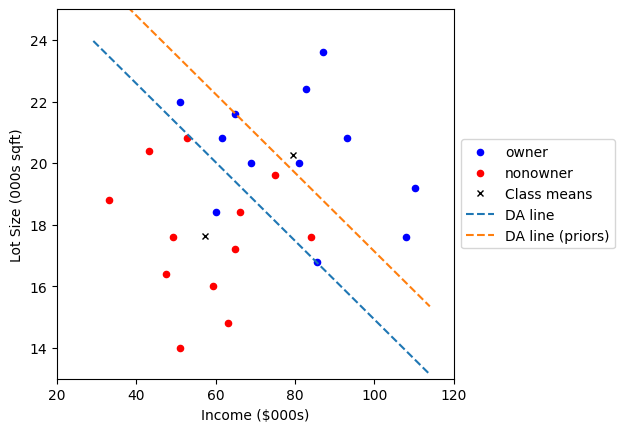

In [11]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)

# Determine the class separation line for the model with priors:
# The coefficients and intercept are extracted from the model that was trained 
# with priors and therefore require no correction for the distortion
x_lda_prior = np.array(ax.get_xlim())
y_lda_prior = (- intercept_prior - c_income_prior * x_lda_prior) / c_lotSize_prior

ax.plot(x_lda, y_lda, '--', label='DA line')
ax.plot(x_lda_prior, y_lda_prior, '--', label='DA line (priors)')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Example 2: Medical Dispatch to Accident Scenes

Ideally, every automobile accident call to the emergency number 911 results in the immediate dispatch of an ambulance to the accident scene. However, in some cases the dispatch might be delayed (e.g., at peak accident hours or in some resource-strapped towns or shifts). In such cases, the 911 dispatchers must make
decisions about which units to send based on sketchy information. It is useful to augment the limited information provided in the initial call with additional information in order to **classify the accident as minor injury, serious injury, or death**. For this purpose, we can use data that were collected on automobile
accidents in the United States in 2001 that involved some type of injury. For each accident, additional information is recorded, such as `day of week`, `weather conditions`, and `road type`.

The goal is to see how well the predictors can be used to classify injury type correctly. To evaluate this, a reduced sample of **600 records** was drawn (with categories combined so that most predictors are binary) and partitioned into training and validation sets, and a discriminant analysis was performed on the
training data. The output structure is very similar to that for the two-class case. The only difference is that each record now has three classification functions (one for each injury type). The rule for classification is still to classify a record to the class that has the highest corresponding classification score. The classification scores are computed, as before, using the classification function coefficients.

In [12]:
accidents_df = pd.read_csv('data/accidents.csv')
print(accidents_df.shape)

accidents_df.head()

(600, 11)


,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,no-injury
1,1,0,1,0,0,0,55,0,1,0,non-fatal
2,1,0,0,0,0,0,35,0,0,1,no-injury
3,1,0,1,0,0,1,35,0,0,1,no-injury
4,1,0,1,0,0,0,25,0,0,1,non-fatal


In [13]:
lda_reg = LDA()
lda_reg.fit(accidents_df.drop(columns=['MAX_SEV']), accidents_df['MAX_SEV'])

print('coefficients and intercept')
fct = pd.concat([
    pd.DataFrame([lda_reg.intercept_], columns=lda_reg.classes_, index=['constant']),
    pd.DataFrame(lda_reg.coef_.transpose(), 
                 columns=lda_reg.classes_,
                 index=list(accidents_df.columns)[:-1])])
print(fct)
print()

coefficients and intercept
                    fatal  no-injury  non-fatal
constant        -1.972659  -0.891172  -0.610471
RushHour        -0.996411   0.033430  -0.015774
WRK_ZONE        -0.457188   0.220012  -0.204480
WKDY            -1.471777   0.165707  -0.135404
INT_HWY          0.755344  -0.075816   0.060599
LGTCON_day       0.009515  -0.031421   0.030124
LEVEL            0.976626  -0.082717   0.063598
SPD_LIM          0.048033   0.004381  -0.005014
SUR_COND_dry    -5.999809  -0.164874   0.257895
TRAF_two_way     0.752985  -0.012844  -0.000048
WEATHER_adverse -6.596690   0.079166   0.032564



In [14]:
lda_reg.classes_

array(['fatal', 'no-injury', 'non-fatal'], dtype='<U9')

In [15]:
accidents_df['MAX_SEV'].value_counts()

MAX_SEV
non-fatal    303
no-injury    292
fatal          5
Name: count, dtype: int64

In [16]:
# confusion matrix is a n_class x n_class matrix 
# rows are the true classes
# columns are the predicted classes
# diagonal are the correct predictions
# off-diagonal are the incorrect predictions
# rows and columns are ordered by the order of lda_reg.classes_

cm = confusion_matrix(accidents_df['MAX_SEV'], 
                      lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])))
cm = pd.DataFrame(cm, index=lda_reg.classes_,
                  columns=lda_reg.classes_)
print('Confusion Matrix (train):')
cm


Confusion Matrix (train):


,fatal,no-injury,non-fatal
fatal,1,1,3
no-injury,6,114,172
non-fatal,6,95,202


In [17]:
percentage_table = 100 * cm.div(cm.sum(axis=1), axis=0).round(2)
percentage_table.style.format("{:.2f}%")

,fatal,no-injury,non-fatal
fatal,20.00%,20.00%,60.00%
no-injury,2.00%,39.00%,59.00%
non-fatal,2.00%,31.00%,67.00%


We can also compute for each accident, the **propensities** (**estimated probabilities**) of belonging to each of the three classes using the same relationship between classification scores and probabilities as in the two-class case.

In [18]:
result = pd.concat([
    pd.DataFrame({'Classification': lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                  'Actual': accidents_df['MAX_SEV']}),
    pd.DataFrame(lda_reg.decision_function(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Score_{}'.format(cls) for cls in lda_reg.classes_]),
    pd.DataFrame(lda_reg.predict_proba(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Propensity_{}'.format(cls) for cls in lda_reg.classes_])
], axis=1)

pd.set_option('display.precision',2)
pd.set_option('chop_threshold', .0001)
print(result.head())

  Classification     Actual  Score_fatal  Score_no-injury  Score_non-fatal  \
0      no-injury  no-injury        -5.94            -0.46            -0.96   
1      no-injury  non-fatal        -1.05            -0.46            -1.04   
2      no-injury  no-injury        -7.88            -0.63            -0.77   
3      no-injury  no-injury        -8.38            -0.54            -0.84   
4      no-injury  non-fatal        -9.84            -0.50            -0.85   

   Propensity_fatal  Propensity_no-injury  Propensity_non-fatal  
0          2.58e-03                  0.62                  0.38  
1          2.63e-01                  0.47                  0.27  
2          3.77e-04                  0.54                  0.46  
3          2.27e-04                  0.57                  0.43  
4          0.00e+00                  0.59                  0.41  


In [19]:
exp_score = np.exp(result.iloc[:,2:5])
est_prob = exp_score.div(exp_score.sum(axis=1), axis=0)
est_prob

,Score_fatal,Score_no-injury,Score_non-fatal
0,2.58e-03,0.62,0.38
1,2.63e-01,0.47,0.27
2,3.77e-04,0.54,0.46
3,2.27e-04,0.57,0.43
4,0.00e+00,0.59,0.41
...,...,...,...
595,2.42e-03,0.51,0.49
596,3.90e-03,0.45,0.55
597,2.42e-03,0.51,0.49
598,1.71e-02,0.45,0.53


## Advantages and Disadvantages

Discriminant analysis is typically considered more of a statistical classification method than a data mining method. This is reflected in its absence or short mention in many data mining resources. However, it is very popular in **social sciences** and has shown good performance. The use and performance of discriminant analysis are similar to those of *multiple linear regression*. The two methods therefore share several advantages and weaknesses.

* Like linear regression, discriminant analysis searches for the optimal weighting of predictors. In linear regression, weighting is with relation to the numerical outcome variable, whereas in discriminant analysis, it is with relation to separating the classes. Both use **least squares** for estimation and the resulting estimates are robust to local optima.

* In both methods, an underlying assumption is **normality**. In discriminant analysis, we assume that the predictors are approximately from a multivariate normal distribution. Although this assumption is **violated in many practical
situations** (such as with commonly-used binary predictors), the method is surprisingly robust.  However, for continuous variables that are found to be **very skewed** (as can be seen through a histogram), transformations such as the **log transform** can improve performance. In addition, the method’s sensitivity to outliers commands exploring the data for extreme values and removing those records from the analysis.

* An advantage of discriminant analysis as a classifier (like logistic regression in this respect) is that it provides estimates of single-predictor contributions (coefficients). This is useful for obtaining a ranking of predictor importance, and for variable selection.

* Finally, the method is computationally simple, parsimonious, and especially useful for small datasets. With its parametric form, discriminant analysis makes the most out of the data and is therefore especially useful with small samples.

## Example 3: Personal Loan Acceptance

The riding mowers example is a classic example and is useful in describing the concept and goal of discriminant analysis. However, in today’s business applications, the number of records is much larger, and their separation into classes is much less distinct. To illustrate this, we consider Universal Bank example, where the bank’s goal is to identify new customers most likely to accept a personal loan. For simplicity, we will consider only two predictor variables: the customer’s annual income (`Income`, in $000s), and the average monthly credit card spending (`CCAvg`, in $000s).

In [20]:
universal_df = pd.read_csv('data/UniversalBank.csv')
print(universal_df.shape)
print()
universal_df.head()

(5000, 14)



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The first figure below shows the acceptance of a personal loan by a subset of 200 customers from the bank’s database as a function of `Income` and `CCAvg`. We use a logarithmic scale on both axes to enhance visibility because there are many points condensed in the low-income, low-CC spending area. Even for this small subset, the separation is not clear.

The second figure shows all 5000 customers and the added complexity of dealing with large numbers of records.

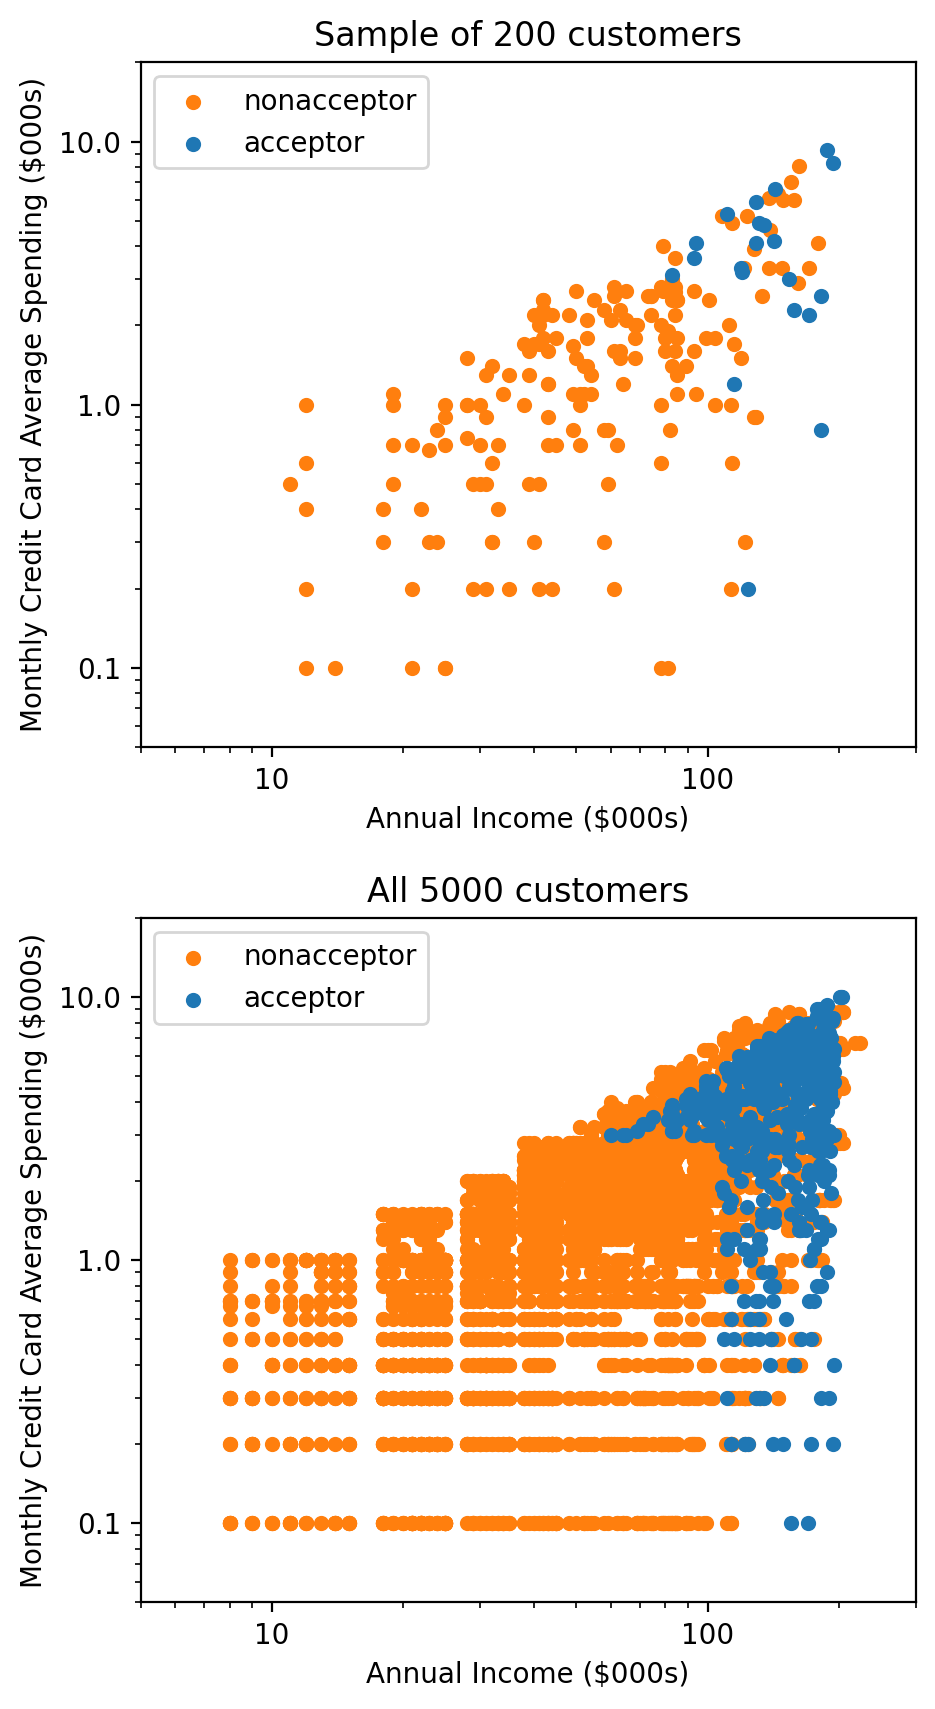

In [21]:
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[5, 10], dpi=200)
plt.subplots_adjust(hspace=0.25)
# plt.tight_layout()

def createGraph(df, title, ax):
    ccIdx = df[df['Personal Loan'] == 0].index
    df.loc[ccIdx].plot(x='Income', y='CCAvg', kind='scatter',
                              label='nonacceptor', color='C1',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    df.drop(ccIdx).plot(x='Income', y='CCAvg', kind='scatter',
                              label='acceptor', color='C0',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    ax.set_xlabel('Annual Income ($000s)')
    ax.set_ylabel('Monthly Credit Card Average Spending ($000s)')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(title)
createGraph(universal_df.sample(200, random_state=10), 'Sample of 200 customers', axes[0])
createGraph(universal_df, 'All 5000 customers', axes[1])
#plt.savefig(str(FIGURES / 'PersonalLoanSample.pdf'))
plt.show()